"Attack Zones" is an innovation introduced by Tom Tango at MLB Advanced Media. The Attack Zones are suppose to provide more context to pitches thrown in and around the rule-book strike zone. Not all pitches thrown in the rule-book strike zone are called for strikes -- and not all pitches thrown outside of the rule-book strike zone are called balls. This results in a round-like strike zone which mostly encompasses the rule-book strike zone but has some gradient properties at the edges of the strike zone. 

<blockquote class="twitter-tweet"><p lang="en" dir="ltr"><a href="https://twitter.com/hashtag/Statcast?src=hash&amp;ref_src=twsrc%5Etfw">#Statcast</a><br>Attack Zones<br><br>This is league-wide, but we&#39;ll be showing it by batter and pitcher. And catcher too. <br><br>We&#39;ll also eventually break up the Shadow zone for catchers especially (by bat-side and/or pitch-type and/or pitcher). <a href="https://t.co/lFcwGedE9p">pic.twitter.com/lFcwGedE9p</a></p>&mdash; Tangotiger (@tangotiger) <a href="https://twitter.com/tangotiger/status/1100484747535544322?ref_src=twsrc%5Etfw">February 26, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


There are four Attack Zones as outlined by Tom Tango: Heart, Shadow, Chase, and Waste. The Heart is contained within the rule-book strike zone. This should contain pitches that should all be called strikes. The Shadow Zone is an area that covers the edge of the rule-book strike zone and several inches beyond the rule-book strike zone. This area is where "50/50" pitches exist -- or rather, pitches that are called strikes 50% of the time. Chase Zone would be pitches that are definitively outside of the strike zone (rule-book or Shadow Zone). Waste Zone pitches should never be called strikes (unless a batter is swinging at a pitch in the Waste Zone). 


!['Attack Zones'](http://tangotiger.net/strikezone/zone%20chart.png) 

Using the guide for plotting the Attack Zones, we can label pitches thrown and also explore the expected strike rate from Nick Wan's model (the `sample_solution.csv` contains Nick Wan's model outputs). 


In [1]:
# import packages 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Several plotting functions to use with matplotlib + seaborn 

def draw_sz(sz_top=3.5, sz_bot=1.5, ls='k-'):
  """
  draw strike zone  
  draw the strike zone on a plot using mpl  
  inputs:
    sz_top: top of strike zone (ft) 
    sz_bot: bottom of strike zone (ft) 
    ls: linestyle (use `plt.plot()` linestyle conventions)  
  output:
    strike zone plot
  """
  plt.plot([-0.708, 0.708], [sz_bot,sz_bot], ls)
  plt.plot([-0.708, -0.708], [sz_bot,sz_top], ls)
  plt.plot([0.708, 0.708], [sz_bot,sz_top], ls)
  plt.plot([-0.708, 0.708], [sz_top,sz_top], ls) 

def draw_home_plate(catcher_perspective=True, ls='k-'):
  """
  draw home plate from either the catcher perspective or pitcher perspective  
  inputs: 
    catcher_perspective: orient home plate in the catcher POV. if False, orients
      home plate in the pitcher POV.  
    ls: linestyle (use `plt.plot()` linestyle conventions)  
  output:
    home plate plot
  """
  if catcher_perspective:
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,-0.3], ls)
    plt.plot([0.708, 0.708], [0,-0.3], ls)
    plt.plot([-0.708, 0], [-0.3, -0.6], ls)
    plt.plot([0.708, 0], [-0.3, -0.6], ls)
  else: 
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,0.1], ls)
    plt.plot([0.708, 0.708], [0,0.1], ls)
    plt.plot([-0.708, 0], [0.1, 0.3], ls)
    plt.plot([0.708, 0], [0.1, 0.3], ls)

def draw_attack_zones():
  """
  draw attack zones 
  draw the statcast attack zones on a plot using mpl  
  inputs:
    none! lulw
  output:
    attack zone plot
  """

  # outer heart / inner shadow
  plt.plot([-0.558, 0.558], [1.833,1.833], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([-0.558, -0.558], [1.833,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([0.558, 0.558], [1.833,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([-0.558, 0.558], [3.166,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3) 

  # outer shadow /  inner chase 
  plt.plot([-1.108, 1.108], [1.166,1.166], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([-1.108, -1.108], [1.166,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([1.108, 1.108], [1.166,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([-1.108, 1.108], [3.833,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3) 

  # outer chase 
  plt.plot([-1.666, 1.666], [0.5,0.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([-1.666, -1.666], [0.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([1.666, 1.666], [0.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([-1.666, 1.666], [4.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3) 

In [3]:
# import data from Kaggle 
test = pd.read_csv("/kaggle/input/nwds-xstrikes/test.csv")
sample_solution = pd.read_csv("/kaggle/input/nwds-xstrikes/sample_solution.csv")
test = test.merge(sample_solution)

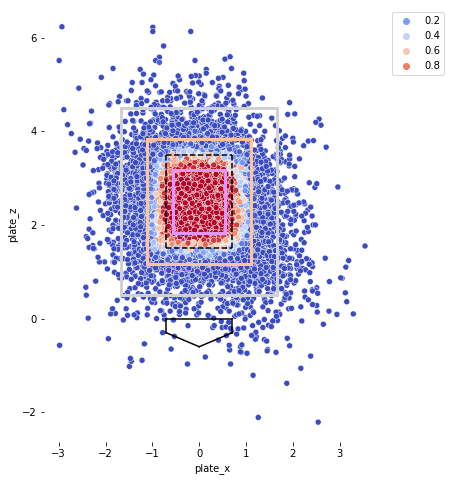

In [4]:
# Plot expected strike probability from the sample_solution.csv 
fig = plt.figure(figsize=(8,8))
fig = sns.scatterplot(data=test.sample(5000), x='plate_x', y='plate_z', 
                      hue='is_strike', palette='coolwarm')
draw_sz(ls='k--')
draw_home_plate()
draw_attack_zones()
fig.set_aspect('equal')
plt.legend(bbox_to_anchor=(1.02,1), loc=2)
sns.despine(left=True, bottom=True)
plt.show()

Using the plotting functions for the Attack Zones and the rule-book strike zone, we can see that there is a very high strike probability inside of the heart, while the Shadow Zone has a decaying probability as you progress away from the Heart Zone. The Chase and Waste Zones both contain nearly-all 0% expected strike pitches.  

Let's use these Attack Zones and label them within our dataset with some `pandas` conditional filtering. 

In [5]:
# create a column called attack_zone
test['attack_zone'] = 'waste'
test.loc[(test['plate_x'].between(-0.558, 0.558)) & (test['plate_z'].between(1.833,3.166)), 'attack_zone'] = 'heart'
test.loc[(test['plate_x'].between(-1.108, 1.108)) & (test['plate_z'].between(1.166,3.833)) & (~test['attack_zone'].isin(['heart'])), 'attack_zone'] = 'shadow'
test.loc[(test['plate_x'].between(-1.666, 1.666)) & (test['plate_z'].between(0.5,4.5)) & (~test['attack_zone'].isin(['heart', 'shadow'])), 'attack_zone'] = 'chase'

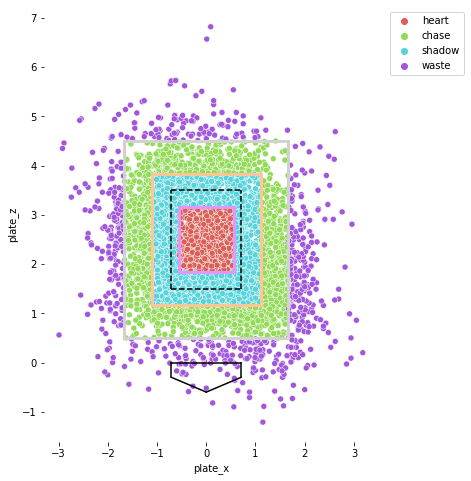

In [6]:
fig = plt.figure(figsize=(8,8))
fig = sns.scatterplot(data=test.sample(5000), x='plate_x', y='plate_z', 
                      hue='attack_zone', palette='hls')
draw_sz(ls='k--')
draw_home_plate()
draw_attack_zones()
fig.set_aspect('equal')
plt.legend(bbox_to_anchor=(1.02,1), loc=2)
sns.despine(left=True, bottom=True)
plt.show()

It looks as though we have correctly defined our Attack Zone areas with `pandas` conditional filtering. Let's do a simple groupby analysis of these zones as they relate to Nick Wan's expected strike values. 

In [7]:
(test
 .loc[:, ['attack_zone', 'is_strike']]
 .groupby('attack_zone')
 .mean()
 .sort_values('is_strike', ascending=False))

,is_strike
attack_zone,
heart,0.983706
shadow,0.479336
chase,0.004429
waste,0.000775


The Heart Zone does contain a vast majority of expected strikes. If we rounded these values, all of these pitches would be called strikes.  

The Shadow Zone contains a 48% expected strike average -- which is close to the hypothesized 50% strike call area.  

The Chase and Waste Zones do not have any expected strikes, which is a good signal for Nick Wan's model (Umpires should not be calling strikes in these zones).  

# TLDR 
You can use Attack Zones as possible features in an expected strikes model. At the very least, it is a nice validity check to see if your model is producing appropriate signal within these advanced strike zone areas.  

You can catch more tutorials around this Kaggle competition live on my stream! 

# https://twitch.tv/nickwan_datasci 